In [ ]:
import os 
os.chdir("../Données")
import glob
import numpy as np
import matplotlib.pyplot as plt

# Lister tous les fichiers .npz

In [2]:
fichiers_npz = glob.glob('*.npz')
print(f"📂 Fichiers .npz trouvés ({len(fichiers_npz)}):")
for i, fichier in enumerate(fichiers_npz):
    print(f"  {i+1}. {fichier}")

# Filtrer les fichiers contenant "COSMOS"
cosmos_files = [f for f in fichiers_npz if "COSMOS" in f]
print(f"Fichiers COSMOS ({len(cosmos_files)}):")
for i, fichier in enumerate(cosmos_files):
    print(f"  {i+1}. {fichier}")

# Charger les données des fichiers COSMOS
data_list = []
for fichier in cosmos_files:
    try:
        data = np.load(fichier, allow_pickle=True)
        data_list.append(data)
        print(f"✅ Chargé: {fichier}")
    except Exception as e:
        print(f"❌ Erreur en chargeant {fichier}: {e}")
        print(f"Total de fichiers COSMOS chargés: {len(data_list)}")

# Vérifier les clés des données chargées
for i, data in enumerate(data_list):
    print(f"\nClés dans le fichier {cosmos_files[i]}:")
    for key in data.keys():
        print(f"  - {key}")
        # Exemple d'accès aux données
        print(f"    Shape de {key}: {data[key].shape}")




📂 Fichiers .npz trouvés (8):
  1. XMM_LSS_v11_uijk_0177_spec_UD.npz
  2. COSMOS_v11_uijk_0001_photo_D.npz
  3. XMM_LSS_v11_uijk_0162_phot_UD.npz
  4. COSMOS_v11_uijk_0020_spec_D.npz
  5. COSMOS_v11_uijk_0073_spec_UD.npz
  6. XMM_LSS_v11_uijk_0162_phot_D.npz
  7. COSMOS_v11_uijk_0213_photo_UD.npz
  8. XMM_LSS_v11_uijk_0006_spec_D.npz
Fichiers COSMOS (4):
  1. COSMOS_v11_uijk_0001_photo_D.npz
  2. COSMOS_v11_uijk_0020_spec_D.npz
  3. COSMOS_v11_uijk_0073_spec_UD.npz
  4. COSMOS_v11_uijk_0213_photo_UD.npz
✅ Chargé: COSMOS_v11_uijk_0001_photo_D.npz
✅ Chargé: COSMOS_v11_uijk_0020_spec_D.npz
✅ Chargé: COSMOS_v11_uijk_0073_spec_UD.npz
✅ Chargé: COSMOS_v11_uijk_0213_photo_UD.npz

Clés dans le fichier COSMOS_v11_uijk_0001_photo_D.npz:
  - cube
    Shape de cube: (12054, 64, 64, 9)
  - info
    Shape de info: (12054,)
  - flag
    Shape de flag: (12054, 9)

Clés dans le fichier COSMOS_v11_uijk_0020_spec_D.npz:
  - cube
    Shape de cube: (15, 64, 64, 9)
  - info
    Shape de info: (15,)
  - flag

Visualisation des Variables

In [3]:
n_afficher = 1  # On affiche seulement le premier objet

for idx, data in enumerate(data_list):
    print(f"\n--- Fichier : {cosmos_files[idx]} ---")
    print("Clés disponibles :", list(data.keys()))

    # Afficher les clés et valeurs de 'info' pour le premier objet
    if 'info' in data:
        info = data['info']
        print("Valeurs de 'info' pour l'objet 0 :")
        if hasattr(info, 'dtype') and info.dtype.names:
            for key in info.dtype.names:
                print(f"{key} : {info[0][key]}")
        else:
            print(info[0])
    else:
        print("Pas de variable 'info' dans ce fichier.")

    # Afficher la valeur du flag pour le premier objet
    if 'flag' in data:
        flag = data['flag']
        print(f"flag : {flag[0]}")
    else:
        print("Pas de variable 'flag' dans ce fichier.")

    # Afficher les infos sur le premier objet du cube
    if 'cube' in data:
        cube_data = data['cube']
        print(f"Cube : shape={cube_data.shape}")
        print(f"Objet 0 : type={type(cube_data[0])}, shape={cube_data[0].shape}")
    else:
        print("Pas de variable 'cube' dans ce fichier.")


--- Fichier : COSMOS_v11_uijk_0001_photo_D.npz ---
Clés disponibles : ['cube', 'info', 'flag']
Valeurs de 'info' pour l'objet 0 :
ID : 0
RA : 149.41077415981383
DEC : 2.8837678646168765
TRACT : 10054
PATCH : b'0,0'
MASK : 0
FLAG_FIELD : 7
EB_V : 0.01756735906672505
CLASS_STAR_HSC_I : 0.35145360231399536
u : 27.456
uS : 27.865
g : 27.788
r : 28.223
i : 28.558
z : 26.957
y : 27.822
J : -99.0
H : -99.0
Ks : -99.0
u_err : 0.216
uS_err : 0.413
g_err : 0.312
r_err : 0.658
i_err : 1.21
z_err : 0.401
y_err : 2.209
J_err : -99.0
H_err : -99.0
Ks_err : -99.0
ZPHOT : 1.5828
OBJ_TYPE : 0.0
COMPACT : 0
STAR_FORMING : 0
ST_TRAIL : 0
CLEAN : 70
EBV : 0.020384427160024643
LABEL : -99
flag : [2 2 2 2 2 2 1 1 1]
Cube : shape=(12054, 64, 64, 9)
Objet 0 : type=<class 'numpy.ndarray'>, shape=(64, 64, 9)

--- Fichier : COSMOS_v11_uijk_0020_spec_D.npz ---
Clés disponibles : ['cube', 'info', 'flag']
Valeurs de 'info' pour l'objet 0 :
ID : 234134
RA : 149.053593352434
DEC : 3.596827876157933
TRACT : 10054
PAT

In [4]:
ebv_list = []
zphot_list = []
zspec_list = []
zflag_list = []

for data in data_list:
    if 'info' in data:
        info = data['info']
        if hasattr(info, 'dtype') and info.dtype.names:
            for obj in info:
                ebv = obj['EBV'] if 'EBV' in info.dtype.names else np.nan
                zphot = obj['ZPHOT'] if 'ZPHOT' in info.dtype.names else np.nan
                zspec = obj['ZSPEC'] if 'ZSPEC' in info.dtype.names else np.nan
                zflag = obj['ZFLAG'] if 'ZFLAG' in info.dtype.names else np.nan
                ebv_list.append(ebv)
                zphot_list.append(zphot)
                zspec_list.append(zspec)
                zflag_list.append(zflag)

def stats(arr, name):
    arr = np.array(arr)
    arr = arr[~np.isnan(arr)]
    print(f"{name}: min={arr.min():.4f}, max={arr.max():.4f}, mean={arr.mean():.4f}")



# Visualiser les images pour chaque bande spectrale

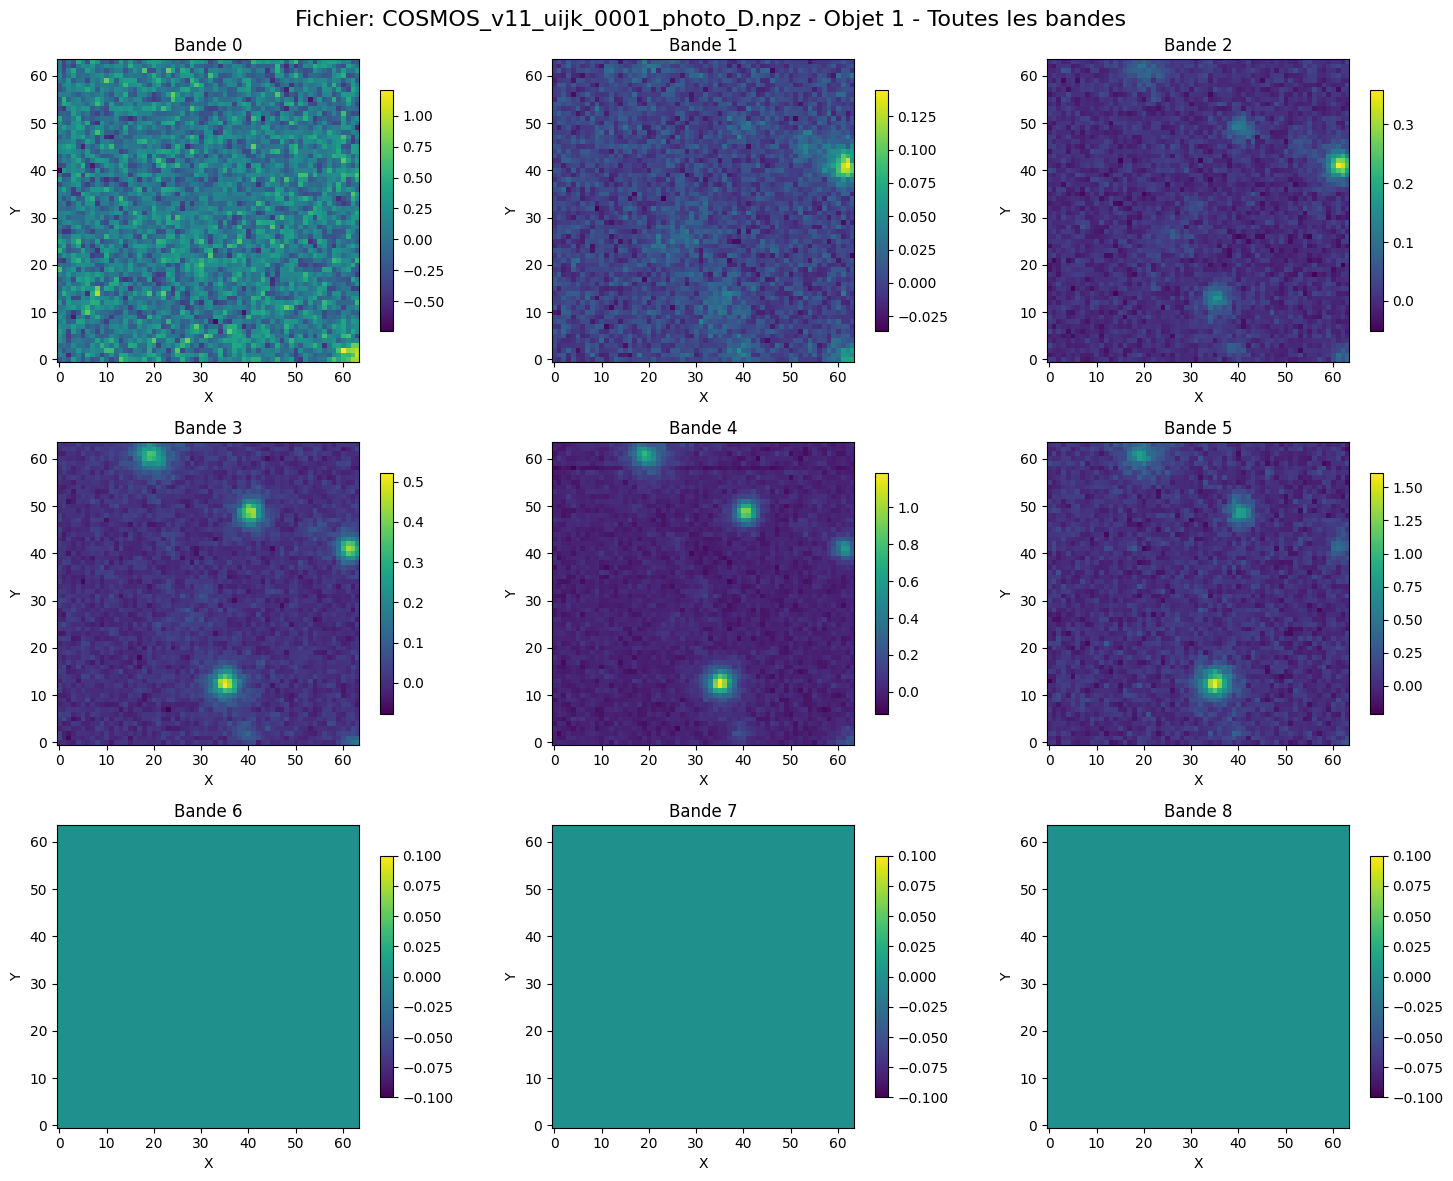

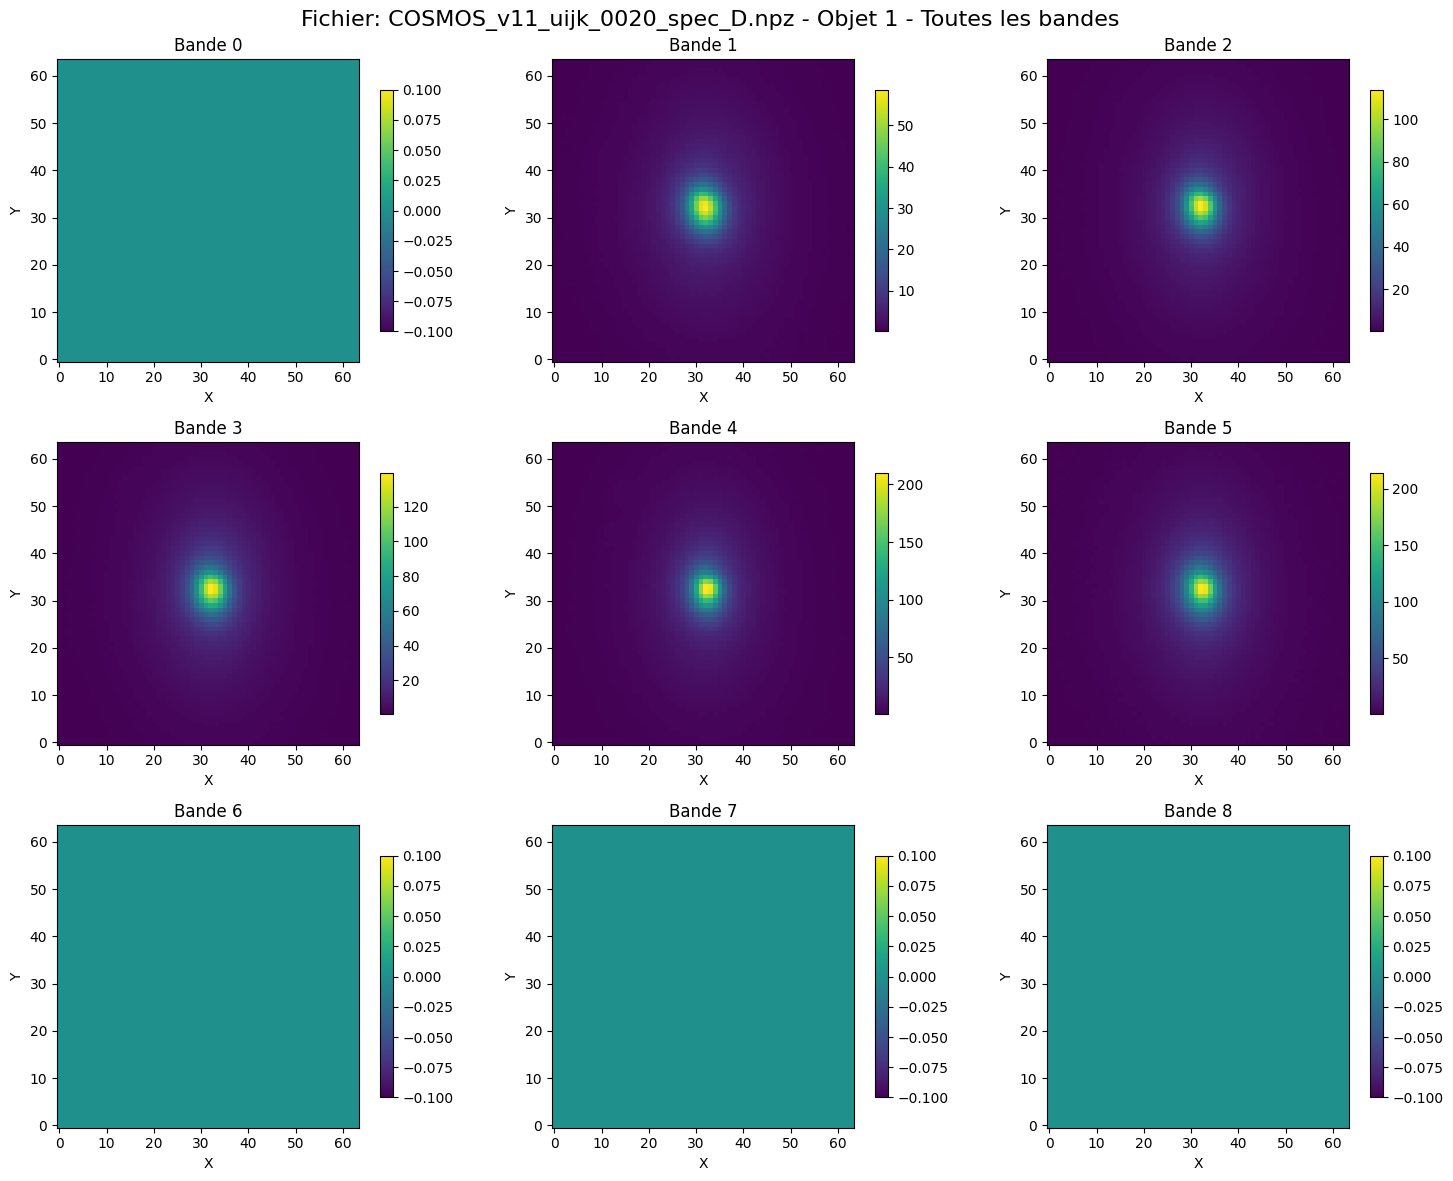

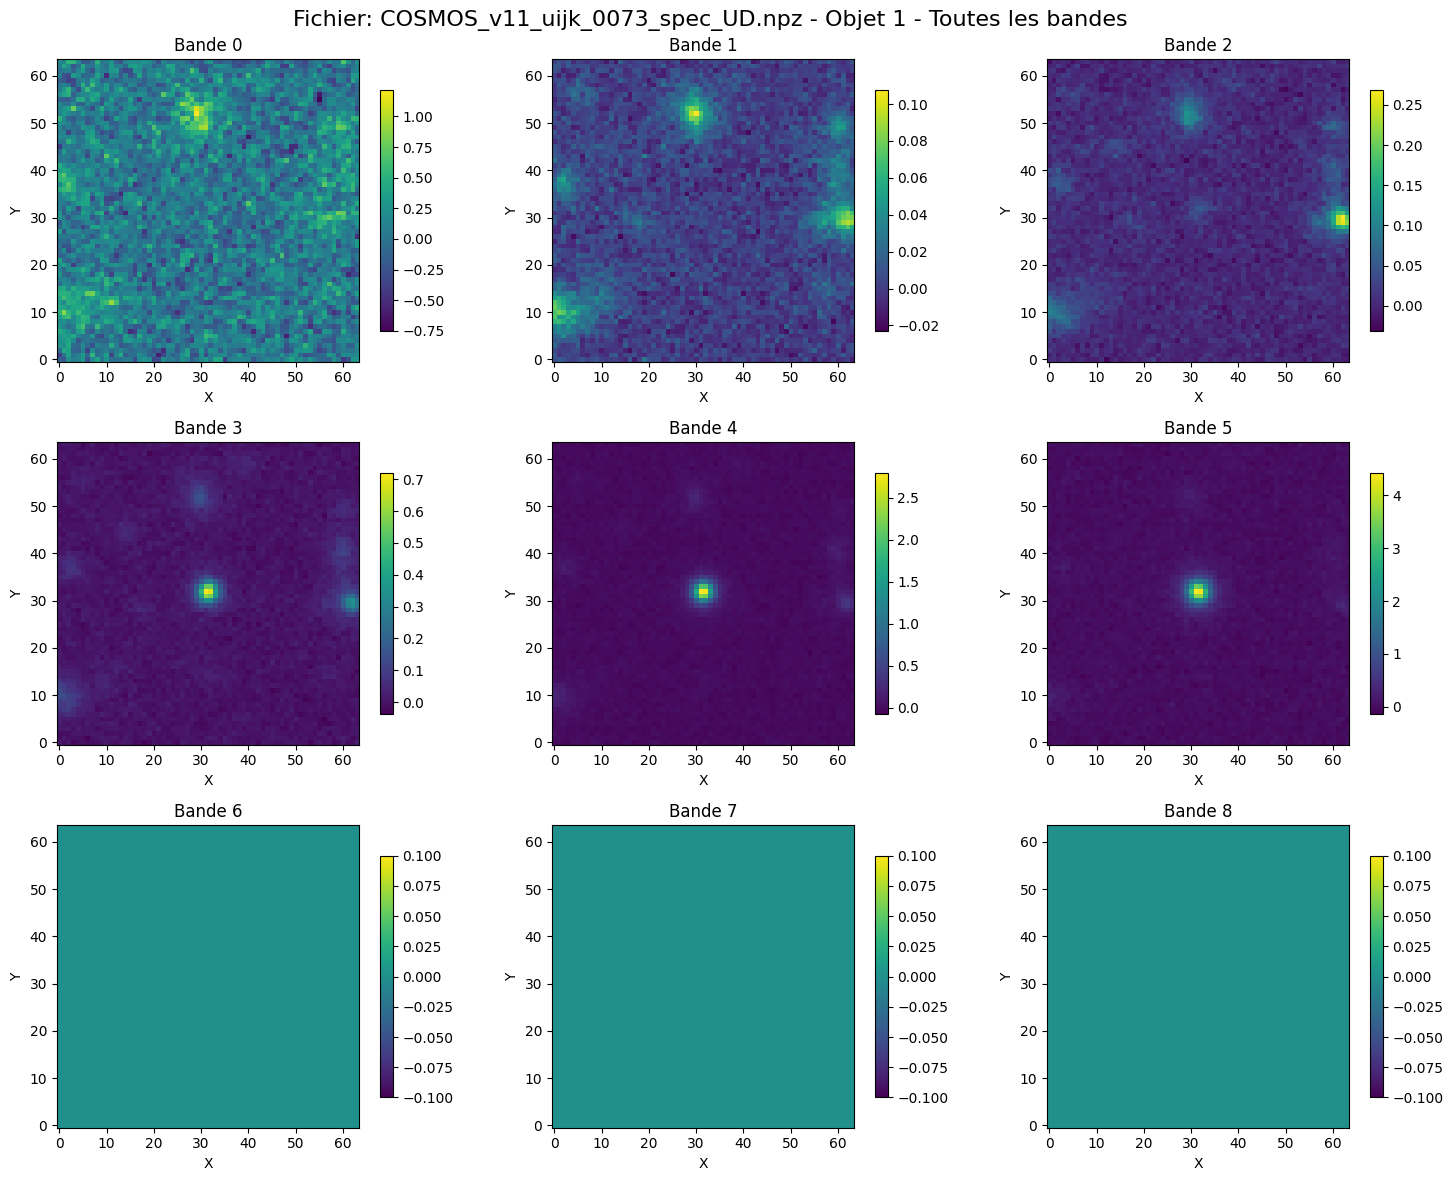

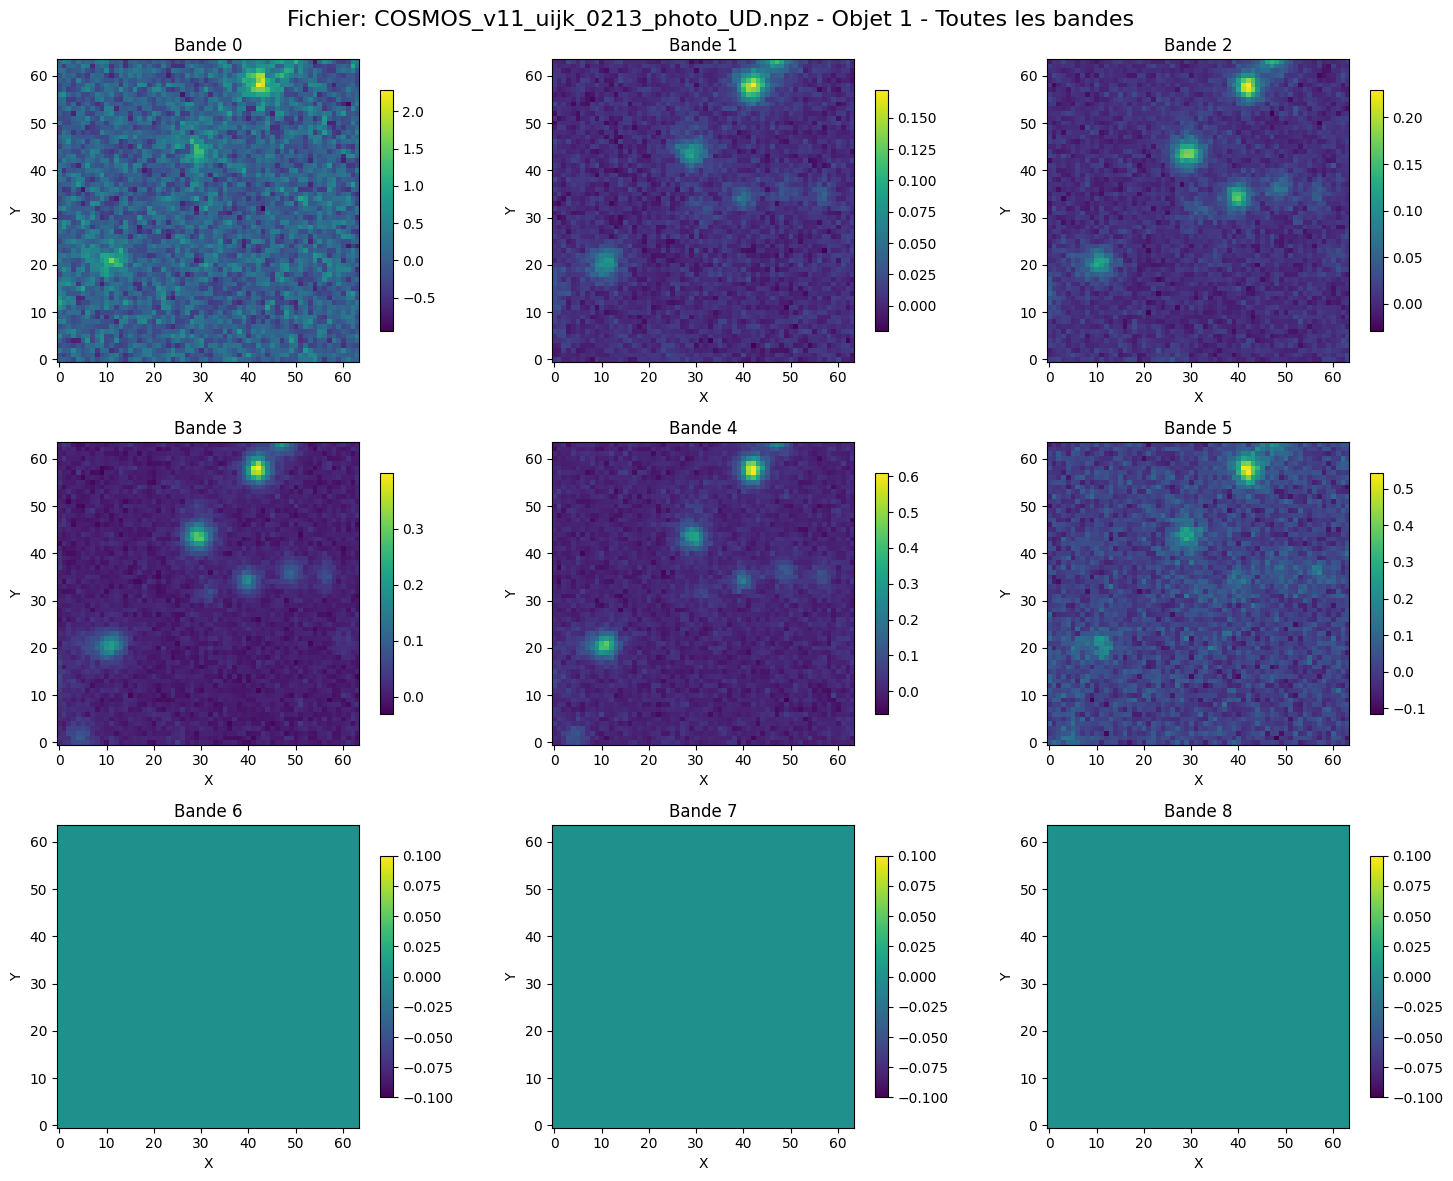

In [5]:


for idx, data in enumerate(data_list):
    if 'cube' in data:
        cube_data = data['cube']
        obj_idx = 1  # Premier objet

        fig, axes = plt.subplots(3, 3, figsize=(15, 12))
        axes = axes.ravel()

        for band in range(min(9, cube_data.shape[3])):
            img = cube_data[obj_idx, :, :, band]
            axes[band].imshow(img, cmap='viridis', origin='lower')
            axes[band].set_title(f'Bande {band}')
            axes[band].set_xlabel('X')
            axes[band].set_ylabel('Y')
            plt.colorbar(axes[band].images[0], ax=axes[band], shrink=0.8)

        for i in range(cube_data.shape[3], 9):
            axes[i].set_visible(False)

        plt.suptitle(f'Fichier: {cosmos_files[idx]} - Objet {obj_idx} - Toutes les bandes', fontsize=16)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Le fichier {cosmos_files[idx]} n'a pas de clé 'cube'.")

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
seuil = 0.1  # Par exemple, pour "très bas"

X = []
y = []

for idx, data in enumerate(data_list):
    if 'cube' in data and 'info' in data and 'flag' in data:
        cube_data = data['cube']
        info = data['info']
        flag = data['flag']
        for obj_idx in range(cube_data.shape[0]):
            val_flag = flag[obj_idx]
            # Si flag est un array, prendre le min ou le max
            if isinstance(val_flag, np.ndarray):
                flag_value = np.min(val_flag)
            else:
                flag_value = val_flag
            if flag_value <= seuil:
                ebv = info[obj_idx]['EBV'] if 'EBV' in info.dtype.names else np.nan
                zphot = info[obj_idx]['ZPHOT'] if 'ZPHOT' in info.dtype.names else np.nan
                zspec = info[obj_idx]['ZSPEC'] if 'ZSPEC' in info.dtype.names else np.nan
                zflag = info[obj_idx]['ZFLAG'] if 'ZFLAG' in info.dtype.names else np.nan
                X.append(cube_data[obj_idx])
                y.append([ebv, zphot, zspec, zflag])

X = np.array(X)
y = np.array(y)
print(f"Nombre d'objets retenus : {X.shape[0]}")
print(f"Shape des images : {X.shape}")
print(f"Shape des labels : {y.shape}")




# paramètres (ajustables)
pct_low, pct_high = 0.1, 99.9     # percentiles pour couper extrêmes
delta_thr = 0.5              # seuil pour |(ZPHOT-ZSPEC)/(1+ZSPEC)|
use_delta_outlier = True      # activer filtrage par delta si ZSPEC existe
min_cols_in_range = 2    # nombre minimum de colonnes de y devant être dans les percentiles

# assurer floats et enlever NaN/inf
X = X.astype(float)
y = y.astype(float)
valid = np.ones(X.shape[0], dtype=bool)

# quitar filas con NaN/inf en X
valid &= ~np.isnan(X).reshape(X.shape[0], -1).any(axis=1)
valid &= ~np.isinf(X).reshape(X.shape[0], -1).any(axis=1)
print(f"After X NaN/inf filter: {valid.sum()} / {X.shape[0]}")

# aplicar recorte por percentiles por columna, solo donde la columna no es NaN
for col in range(y.shape[1]):
    col_vals = y[:, col]
    mask_col = (~np.isnan(col_vals)) & valid
    if col_vals[mask_col].size == 0:
        continue
    lo = np.percentile(col_vals[mask_col], pct_low)
    hi = np.percentile(col_vals[mask_col], pct_high)
    out_of_range = ((col_vals < lo) | (col_vals > hi)) & (~np.isnan(col_vals))
    valid &= ~out_of_range
    print(f"After percentile clip col {col}: {valid.sum()}")

# filtrado por delta solo donde existe ZSPEC
if use_delta_outlier and y.shape[1] >= 3:
    zphot = y[:, 1]
    zspec = y[:, 2]
    has_zspec = (~np.isnan(zspec)) & valid
    delta = np.full_like(zphot, np.nan, dtype=float)
    delta[has_zspec] = (zphot[has_zspec] - zspec[has_zspec]) / (1.0 + zspec[has_zspec])
    out_delta = (has_zspec) & (np.abs(delta) > delta_thr)
    valid &= ~out_delta
    print(f"After delta filter: {valid.sum()} / {X.shape[0]}")

# ahora X_clean/y_clean basados en este valid menos restrictivo
X_clean = X[valid]
y_clean = y[valid]
print(f"Total original: {X.shape[0]} -> Nettoyé: {X_clean.shape[0]} (removed {X.shape[0]-X_clean.shape[0]})")

# standardiser les labels pour perte homogène entre variables
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y_clean)

# normaliser images (0-1)
X_clean = X_clean / np.max(X_clean)

# split final (remplacez l'ancienne cellule train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_scaled, test_size=0.2, random_state=42)


Nombre d'objets retenus : 12385
Shape des images : (12385, 64, 64, 9)
Shape des labels : (12385, 4)
After X NaN/inf filter: 12385 / 12385
After percentile clip col 0: 12373
After percentile clip col 1: 12348
After percentile clip col 2: 12347
After percentile clip col 3: 12347
After delta filter: 12346 / 12385
Total original: 12385 -> Nettoyé: 12346 (removed 39)


In [7]:
from sklearn.model_selection import train_test_split

# Séparation des données (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Normalizar imágenes (entre 0 y 1)
X_train = X_train / np.max(X_train)
X_test = X_test / np.max(X_test)

# Reemplazar NaN en las etiquetas por 0
y_train = np.nan_to_num(y_train, nan=0.0)
y_test = np.nan_to_num(y_test, nan=0.0)

print(f"Train : {X_train.shape}, {y_train.shape}")
print(f"Test  : {X_test.shape}, {y_test.shape}")

Train : (9908, 64, 64, 9), (9908, 4)
Test  : (2477, 64, 64, 9), (2477, 4)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from sklearn.metrics import mean_squared_error



# Exemple de modèle simple
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=X_train.shape[1:]),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(4)  # 4 sorties : EBV, ZPHOT, ZSPEC, ZFLAG
])

model.compile(optimizer='adam', loss='mse')

# Entraînement
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Évaluation sur le test
loss = model.evaluate(X_test, y_test)
print(f"Loss sur le test : {loss}")

y_pred = model.predict(X_test)

# Calcular MSE por variable
for i, name in enumerate(["EBV", "ZPHOT", "ZSPEC", "ZFLAG"]):
    mse = mean_squared_error(y_test[:, i], y_pred[:, i])
    print(f"MSE {name}: {mse:.4f}")


print("Stats des variables sur tous les objets :")
stats(ebv_list, "EBV")
stats(zphot_list, "ZPHOT")
stats(zspec_list, "ZSPEC")
stats(zflag_list, "ZFLAG")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
279/279 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.2666 - val_loss: 0.2353
Epoch 2/10
279/279 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.2051 - val_loss: 0.2376
Epoch 3/10
279/279 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.1988 - val_loss: 0.2268
Epoch 4/10
279/279 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.1871 - val_loss: 0.2250
Epoch 5/10
279/279 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.1863 - val_loss: 0.2157
Epoch 6/10
279/279 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.1830 - val_loss: 0.2067
Epoch 7/10
279/279 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.1710 - val_loss: 0.2054
Epoch 8/10
279/279 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.1632 - val_loss: 0.1942
Epoch 9/10
279/279 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.1679 - val_loss: 0.2035
Epoch 10/10
279/279 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.1635 - val_loss: 0.1940
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2283
Loss sur le test : 0.2334740310907364
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/ste

In [9]:
import numpy as np

def redshift_metrics(z_pred, z_spec, threshold="fixed", k=5, fixed_thr=0.15, use_median_bias=True):
    """
    Calcule des métriques classiques pour redshift photométrique :
      - bias (tendance systématique)
      - sigma_NMAD (dispersion robuste)
      - fraction d'outliers (selon un critère choisi)
    
    Paramètres
    ----------
    z_pred : array-like
        Redshift photométrique prédit (par ex. ZPHOT).
    z_spec : array-like
        Redshift spectroscopique de référence (ZSPEC).
    threshold : {"fixed", "nmad"}
        "fixed"  -> outlier si |δ| > fixed_thr
        "nmad"   -> outlier si |δ| > k * sigma_NMAD
    k : float
        Facteur multiplicatif pour le critère relatif basé sur sigma_NMAD.
    fixed_thr : float
        Seuil absolu pour le critère fixe (classique : 0.15).
    use_median_bias : bool
        True  -> bias = median(δ)
        False -> bias = mean(δ)

    Retour
    ------
    dict avec keys: bias, sigma_nmad, outlier_fraction, mae_delta, rmse_delta, n
    """
    z_pred = np.asarray(z_pred, dtype=float)
    z_spec = np.asarray(z_spec, dtype=float)

    # δ = (z_pred - z_spec) / (1 + z_spec)  -> erreur normalisée
    delta = (z_pred - z_spec) / (1.0 + z_spec)

    # Bias : par défaut la médiane (plus robuste). Mettre use_median_bias=False pour la moyenne.
    bias = np.median(delta) if use_median_bias else np.mean(delta)

    # sigma_NMAD : 1.48 * médiane(|δ - médiane(δ)|) -> mesure robuste de dispersion
    sigma_nmad = 1.48 * np.median(np.abs(delta - np.median(delta)))

    # Définition des outliers selon le critère choisi
    if threshold == "fixed":
        is_out = np.abs(delta) > fixed_thr
    elif threshold == "nmad":
        is_out = np.abs(delta) > (k * sigma_nmad)
    else:
        raise ValueError("threshold doit être 'fixed' ou 'nmad'.")

    outlier_fraction = np.mean(is_out)

    # Indicateurs complémentaires sur δ (facultatif)
    mae_delta = np.mean(np.abs(delta))
    rmse_delta = np.sqrt(np.mean(delta**2))

    return {
        "bias": float(bias),
        "sigma_nmad": float(sigma_nmad),
        "outlier_fraction": float(outlier_fraction),
        "mae_delta": float(mae_delta),
        "rmse_delta": float(rmse_delta),
        "n": int(delta.size)
    }

# ====== Préparation des données de métriques ======
# Hypothèse de mapping de colonnes de votre sortie :
# y_pred[:, 1] -> ZPHOT prédit par le modèle
# y_test[:, 2] -> ZSPEC (vérité terrain)
zphot_pred = y_pred[:, 1]
zspec_true = y_test[:, 2]

# (Optionnel) Filtrage qualité via ZFLAG si disponible dans y_test (colonne 3)
# Hypothèse : ZFLAG == 0 => spectre fiable. Adaptez selon votre dataset.
if y_test.shape[1] >= 4:
    zflag_true = y_test[:, 3]
    valid_mask = (~np.isnan(zphot_pred)) & (~np.isnan(zspec_true)) & (zflag_true == 0)
else:
    valid_mask = (~np.isnan(zphot_pred)) & (~np.isnan(zspec_true))

zphot_pred_v = zphot_pred[valid_mask]
zspec_true_v = zspec_true[valid_mask]

print(f"N objets valides pour les métriques: {zspec_true_v.size}")

# ====== Métriques avec seuil fixe |δ| > 0.15 (standard fréquent dans la littérature) ======
m_fixed = redshift_metrics(
    zphot_pred_v, zspec_true_v,
    threshold="fixed",
    fixed_thr=0.15,           # ajustez si le papier utilise un autre seuil (ex: 0.10)
    use_median_bias=True      # passez à False si le papier définit le bias par la moyenne
)

# ====== Métriques avec seuil relatif |δ| > k * sigma_NMAD (robuste à l'échelle) ======
m_nmad = redshift_metrics(
    zphot_pred_v, zspec_true_v,
    threshold="nmad",
    k=5,                      # ajustez (ex: k=3) selon la définition du papier
    use_median_bias=True
)

# ====== Affichage formaté ======
print("\n--- Métriques photométriques (seuil fixe |δ| > 0.15) ---")
print(f"bias (médiane δ) : {m_fixed['bias']:.6f}")
print(f"sigma_NMAD       : {m_fixed['sigma_nmad']:.6f}")
print(f"fraction outliers: {m_fixed['outlier_fraction']:.4%}")
print(f"MAE(δ)           : {m_fixed['mae_delta']:.6f}")
print(f"RMSE(δ)          : {m_fixed['rmse_delta']:.6f}")
print(f"N                 : {m_fixed['n']}")

print("\n--- Métriques photométriques (seuil relatif |δ| > 5 * sigma_NMAD) ---")
print(f"bias (médiane δ) : {m_nmad['bias']:.6f}")
print(f"sigma_NMAD       : {m_nmad['sigma_nmad']:.6f}")
print(f"fraction outliers: {m_nmad['outlier_fraction']:.4%}")
print(f"MAE(δ)           : {m_nmad['mae_delta']:.6f}")
print(f"RMSE(δ)          : {m_nmad['rmse_delta']:.6f}")
print(f"N                 : {m_nmad['n']}")


N objets valides pour les métriques: 2474

--- Métriques photométriques (seuil fixe |δ| > 0.15) ---
bias (médiane δ) : 1.200352
sigma_NMAD       : 0.532550
fraction outliers: 99.1108%
MAE(δ)           : 1.132754
RMSE(δ)          : 1.240046
N                 : 2474

--- Métriques photométriques (seuil relatif |δ| > 5 * sigma_NMAD) ---
bias (médiane δ) : 1.200352
sigma_NMAD       : 0.532550
fraction outliers: 0.3234%
MAE(δ)           : 1.132754
RMSE(δ)          : 1.240046
N                 : 2474
